In [1]:
#%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bk_train_na = pd.read_csv('bk_train_na.csv')

In [3]:
bk_train_na.head()

,Unnamed: 0,Latitude,Longitude,Created Date,Closed Date,Incident Zip,Police Precincts,Community Board,Start Date,Close Date,Resolution Time (days),YEAR,Count,Neighborhood,Center Lo,Center La
0,0,40.696892,-73.974561,03/13/2017 10:24:50 AM,06/05/2017 12:00:00 AM,11205.0,55.0,02,2017-03-13 10:24:50,2017-06-05 00:00:00,83.0,2017,1,Fort Greene,-73.974883,40.690803
1,2,40.633669,-74.000685,03/14/2017 08:51:04 AM,06/05/2017 12:00:00 AM,11219.0,39.0,12,2017-03-14 08:51:04,2017-06-05 00:00:00,82.0,2017,1,Borough Park,-73.988663,40.630958
2,3,40.702580,-73.945714,03/14/2017 03:50:57 PM,04/06/2017 12:00:00 AM,11206.0,56.0,01,2017-03-14 15:50:57,2017-04-06 00:00:00,22.0,2017,1,Bedford,-73.949906,40.691516
3,5,40.630213,-74.004305,03/14/2017 08:52:50 AM,04/04/2017 12:00:00 AM,11219.0,41.0,10,2017-03-14 08:52:50,2017-04-04 00:00:00,20.0,2017,1,Dyker Heights,-74.012095,40.622446
4,9,40.700413,-73.912687,03/14/2017 07:28:38 PM,04/21/2017 12:00:00 AM,11237.0,53.0,04,2017-03-14 19:28:38,2017-04-21 00:00:00,37.0,2017,1,Bushwick North,-73.917767,40.700569


In [6]:
train = bk_train_na[['Neighborhood', 'Start Date', 'Close Date', 'YEAR', 'Count', 'Resolution Time (days)']]

In [7]:
train['Month'] = pd.DatetimeIndex(train['Start Date']).strftime("%m")

/Users/fannyshum/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
train.head()

,Neighborhood,Start Date,Close Date,YEAR,Count,Resolution Time (days),Month
0,Fort Greene,2017-03-13 10:24:50,2017-06-05 00:00:00,2017,1,83.0,03
1,Borough Park,2017-03-14 08:51:04,2017-06-05 00:00:00,2017,1,82.0,03
2,Bedford,2017-03-14 15:50:57,2017-04-06 00:00:00,2017,1,22.0,03
3,Dyker Heights,2017-03-14 08:52:50,2017-04-04 00:00:00,2017,1,20.0,03
4,Bushwick North,2017-03-14 19:28:38,2017-04-21 00:00:00,2017,1,37.0,03


In [20]:
train_nbhd_month = train[['Neighborhood', 'YEAR', 'Month', 'Count']]

In [21]:
train_nbhd_month = train_nbhd_month.groupby(['Neighborhood', 'YEAR', 'Month']).sum()

In [22]:
train_nbhd_month = train_nbhd_month.reset_index()

In [23]:
train_nbhd_month

,Neighborhood,YEAR,Month,Count
0,Bath Beach,2010,03,2
1,Bath Beach,2010,04,34
2,Bath Beach,2010,05,2
3,Bath Beach,2010,06,1
4,Bath Beach,2010,08,1
5,Bath Beach,2010,09,1
6,Bath Beach,2011,01,1
7,Bath Beach,2011,03,1
8,Bath Beach,2011,04,2
9,Bath Beach,2011,06,4


In [244]:
Neigh = list(train['Neighborhood'].unique())

In [245]:
Neigh

['Fort Greene',
 'Borough Park',
 'Bedford',
 'Dyker Heights',
 'Bushwick North',
 'Prospect Lefferts Gardens-Wingate',
 'Bushwick South',
 'Clinton Hill',
 'Flatbush',
 'North Side-South Side',
 'Flatlands',
 'Bensonhurst East',
 'Homecrest',
 'East Flatbush-Farragut',
 'Greenpoint',
 'Ocean Parkway South',
 'East Williamsburg',
 'Stuyvesant Heights',
 'Cypress Hills-City Line',
 'park-cemetery-etc-Brooklyn',
 'Prospect Heights',
 'Crown Heights North',
 'Bensonhurst West',
 'Windsor Terrace',
 'Park Slope-Gowanus',
 'Sunset Park East',
 'Bay Ridge',
 'Carroll Gardens-Columbia Street-Red Hook',
 'Brooklyn Heights-Cobble Hill',
 'Canarsie',
 'Williamsburg',
 'East New York',
 'Georgetown-Marine Park-Bergen Beach-Mill Basin',
 'DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill',
 'Midwood',
 'Bath Beach',
 'Kensington-Ocean Parkway',
 'Sheepshead Bay-Gerritsen Beach-Manhattan Beach',
 'Sunset Park West',
 'Crown Heights South',
 'Brownsville',
 'East New York (Pennsylvania Ave)',
 'Erasm

In [246]:
Neigh = Neigh[:-1]

In [53]:
years = list(range(2010, 2019))

In [26]:
months = [str(i).zfill(2) for i in range(1, 13)]

In [54]:
m_y = []
for n in nbhd:
    for yr in years:
        for mon in months:
            m_y.append((n, yr, mon))

In [36]:
m_y[:2]

[('Greenpoint', 2010, '01'), ('Greenpoint', 2010, '02')]

In [55]:
default_datetime = pd.DataFrame(m_y, columns = ['Neighborhood', 'YEAR', 'Month'])

In [56]:
train_set = pd.merge(train_nbhd_month, default_datetime, how='outer')

In [58]:
train_set = train_set.sort_values(by=['Neighborhood', 'YEAR', 'Month'])

In [73]:
train1 = train_set.dropna(subset=['Neighborhood'])

In [74]:
train1 = train1.fillna(0)

In [123]:
train2 = train1[['Neighborhood', 'Month', 'Count']]

In [95]:
train1.head()

,Neighborhood,YEAR,Month,Count
5153,Bath Beach,2010,01,0.0
5154,Bath Beach,2010,02,0.0
0,Bath Beach,2010,03,2.0
1,Bath Beach,2010,04,34.0
2,Bath Beach,2010,05,2.0


In [122]:
len(train1)

5576

In [76]:
y_train = train1['Count']

In [81]:
from sklearn import base
class ColumnSelectTransformer(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self, col_names):
        self.col_names = col_names  # We will need these in transform()
    
    def fit(self, X, y=None):
        # This transformer doesn't need to learn anything about the data,
        # so it can just return self without any further processing
        return self
    
    def transform(self, X):
        # Return an array with the same number of rows as X and one
        # column for each in self.col_names
        array = []
        if len(X)>1:
            for i in range(len(X)):
                r = []
                for name in self.col_names:
                    r.append(X.iloc[i][name])
                array.append(r)
        else:
            r = []
            for name in self.col_names:
                r.append(X[name])
            array.append(r)
        return array

In [154]:
from sklearn import base

class GroupbyEstimator():
    def __init__(self, column, estimator_factory):
        self.column = str(column)
        self.estimator_factory = estimator_factory
        self.models = {}
        
    def fit(self, X, y):
        self.models = {}
        groups = X[self.column].unique()
        
        for group in groups:
            self.models[group] = self.estimator_factory().fit(X[X[self.column]==group], y[X[self.column] == group])
        return self
    
    def predict(self, X):
        predictions = np.zeros((X.shape[0], 1))
        for i in range(len(X)):
            predictions[i] = self.models[X.iloc[i][self.column]].predict(X.iloc[i:i+1])
        return predictions

In [83]:
from sklearn.preprocessing import OneHotEncoder

In [84]:
from sklearn.linear_model import LinearRegression

In [90]:
from sklearn.pipeline import Pipeline

In [124]:
def season_factory():
    return Pipeline([('hot encode', OneHotEncoder(sparse=False)), 
                     ('linreg', LinearRegression())
                    ])

In [155]:
month_model = GroupbyEstimator('Neighborhood', season_factory).fit(train2[['Neighborhood', 'Month']], train2['Count'])

In [156]:
train2['predicted_count'] = month_model.predict(train2[['Neighborhood', 'Month']])

In [158]:
from sklearn import metrics

print("R^2:", metrics.r2_score(train['Count'], train2['predicted_count']))

R^2: 0.3592056598635942


In [159]:
train1['predicted_ct'] = train2['predicted_count']

# Updated Data
Updated on August 2019

In [201]:
updated_data = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

/Users/fannyshum/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (8,17,31,32,33,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [203]:
updated_graf = updated_data[updated_data['Descriptor']=='Graffiti']

In [204]:
updated_graf.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
4010,36477767,06/18/2017 07:53:21 PM,06/22/2017 11:00:29 AM,DOT,Department of Transportation,Broken Muni Meter,Graffiti,Street,10034,83 PAYSON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.867699,-73.927349,"(40.867698631052825, -73.92734919402088)"
17096,36495787,06/20/2017 06:41:05 PM,06/23/2017 10:49:34 AM,DOT,Department of Transportation,Broken Muni Meter,Graffiti,Street,11223,400 AVENUE U,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.597403,-73.969313,"(40.59740326044884, -73.96931304002959)"
27428,36510113,06/21/2017 12:18:48 PM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,NaN,NaN,20TH 20TH AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61494,36554612,06/27/2017 12:48:05 PM,06/28/2017 08:21:11 AM,DOT,Department of Transportation,Broken Muni Meter,Graffiti,Street,11209,8510 5 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.622001,-74.025792,"(40.62200056973886, -74.02579202094883)"
72710,36570306,06/28/2017 10:15:19 PM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,NaN,NaN,2498 Skidmore avenue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
updated_graf["Start Date"] = pd.to_datetime(updated_graf["Created Date"])

/Users/fannyshum/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [206]:
updated_graf["Close Date"] = pd.to_datetime(updated_graf["Closed Date"], errors='coerce')

/Users/fannyshum/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [207]:
updated_graf = updated_graf.set_index(updated_graf["Start Date"])

In [208]:
graf_2019 = updated_graf.loc['2019-01-01':'2019-08-27']

In [209]:
len(graf_2019)

12471

In [210]:
graf_2019.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,Start Date,Close Date
Start Date,,,,,,,,,,,,,,,,,,,,,
2019-02-25 10:36:07,41780345,02/25/2019 10:36:07 AM,05/29/2019 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,11223,110 U AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.596201,-73.980217,"(40.59620068837685, -73.98021695380503)",2019-02-25 10:36:07,2019-05-29
2019-02-25 13:03:52,41783870,02/25/2019 01:03:52 PM,06/04/2019 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Comercial,11208,1279 SUTTER AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.672943,-73.870837,"(40.67294276204304, -73.870836805132)",2019-02-25 13:03:52,2019-06-04
2019-02-25 12:16:09,41784310,02/25/2019 12:16:09 PM,06/05/2019 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Residential,11219,905 43 STREET,...,NaN,NaN,NaN,NaN,NaN,40.643476,-73.997027,"(40.64347590197473, -73.99702719756613)",2019-02-25 12:16:09,2019-06-05
2019-01-14 12:04:59,41422919,01/14/2019 12:04:59 PM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Comercial,11432,165-23 HILLSIDE AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.709323,-73.797163,"(40.70932277831173, -73.79716262520984)",2019-01-14 12:04:59,NaT
2019-02-25 10:37:24,41794090,02/25/2019 10:37:24 AM,05/28/2019 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,11226,764 ROGERS AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.652299,-73.952652,"(40.65229890808396, -73.95265230858087)",2019-02-25 10:37:24,2019-05-28


In [212]:
graf_2019_clean = graf_2019[['Start Date', 'Close Date', 'Incident Zip', 'Latitude', 'Longitude']]

In [215]:
graf_2019_clean["Resolution Time (days)"] = (graf_2019_clean["Close Date"] - graf_2019_clean["Start Date"]).astype('timedelta64[D]')

/Users/fannyshum/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [218]:
graf_2019_clean['YEAR'] = pd.DatetimeIndex(graf_2019_clean['Start Date']).strftime("%Y")

/Users/fannyshum/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [219]:
graf_2019_clean['Count'] = 1

/Users/fannyshum/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [222]:
graf_2019_clean['Month'] = pd.DatetimeIndex(graf_2019_clean['Start Date']).strftime("%m")

/Users/fannyshum/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [230]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [231]:
nbhd = gpd.read_file('http://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/nynta/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=geojson')

In [232]:
BK = nbhd[nbhd['BoroName'] == 'Brooklyn']

In [233]:
def which_nbhd(df):
    point_nbhd = []
    for i in range(len(df)):
        point = Point(float(df.iloc[i]['Longitude']), float(df.iloc[i]['Latitude']))
        for j in range(len(BK)):
            if BK.iloc[j]['geometry'].contains(point):
                center = BK.iloc[j]['geometry'].centroid
                point_nbhd.append((float(df.iloc[i]['Longitude']), 
                                   float(df.iloc[i]['Latitude']), 
                                   BK.iloc[j]['NTAName'], center.x, center.y))
                break
    return point_nbhd

In [234]:
nbhds_lola = pd.DataFrame(which_nbhd(graf_2019_clean), columns=['Longitude', 'Latitude', 'Neighborhood', 'Center Lo', 'Center La'])

In [235]:
graf_2019_clean = graf_2019_clean.merge(nbhds_lola, how='left', left_on=['Longitude', 'Latitude'], right_on=['Longitude', 'Latitude'])

In [237]:
graf_count = graf_2019_clean[['Neighborhood', 'YEAR', 'Month', 'Count']]

In [238]:
graf_count = graf_count.groupby(['Neighborhood', 'YEAR', 'Month']).count()

In [240]:
graf_count = graf_count.reset_index()

In [241]:
graf_count.head()

,Neighborhood,YEAR,Month,Count
0,Bath Beach,2019,03,14
1,Bath Beach,2019,04,1
2,Bath Beach,2019,05,5
3,Bay Ridge,2019,01,11
4,Bay Ridge,2019,02,22


In [254]:
temp_2019 = []
for n in Neigh:
    for mon in months:
        temp_2019.append((n, '2019', mon))

In [255]:
temp_2019_df = pd.DataFrame(temp_2019, columns = ['Neighborhood', 'YEAR', 'Month'])

In [256]:
temp_2019_df.head()

,Neighborhood,YEAR,Month
0,Fort Greene,2019,01
1,Fort Greene,2019,02
2,Fort Greene,2019,03
3,Fort Greene,2019,04
4,Fort Greene,2019,05


In [257]:
graf_count_filled = pd.merge(graf_count, temp_2019_df, how='outer')

In [261]:
graf_count_filled = graf_count_filled.sort_values(by=['Neighborhood', 'YEAR', 'Month'])

In [264]:
graf_count_filled = graf_count_filled.fillna(0)

In [266]:
graf_count_filled['predicted_count'] = month_model.predict(graf_count_filled[['Neighborhood', 'Month']])

In [268]:
graf_count_filled

,Neighborhood,YEAR,Month,Count,predicted_count
497,Bath Beach,2019,01,0.0,0.000000
498,Bath Beach,2019,02,0.0,0.500000
0,Bath Beach,2019,03,14.0,3.500000
1,Bath Beach,2019,04,1.0,9.500000
2,Bath Beach,2019,05,5.0,4.000000
499,Bath Beach,2019,06,0.0,3.500000
500,Bath Beach,2019,07,0.0,0.500000
501,Bath Beach,2019,08,0.0,3.500000
502,Bath Beach,2019,09,0.0,5.000000
503,Bath Beach,2019,10,0.0,1.500000


In [281]:
graf_count_temp = graf_count_filled[['Neighborhood', 'YEAR', 'Month', 'Count']]

In [273]:
graf_count_pred = graf_count_filled[['Neighborhood', 'Month', 'predicted_count']]

In [274]:
graf_count_pred.columns = ['Neighborhood', 'Month', 'Count']

In [275]:
graf_count_pred['YEAR'] = '2019 Prediction'

/Users/fannyshum/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [276]:
graf_count_pred.head()

,Neighborhood,Month,Count,YEAR
497,Bath Beach,01,0.0,2019 Prediction
498,Bath Beach,02,0.5,2019 Prediction
0,Bath Beach,03,3.5,2019 Prediction
1,Bath Beach,04,9.5,2019 Prediction
2,Bath Beach,05,4.0,2019 Prediction


In [282]:
graf_count_plot = pd.concat([graf_count_temp, graf_count_pred], ignore_index=True)

/Users/fannyshum/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


# Prediction Plot
Comparison to actual graffiti counts to the predicted total month by month for 2019.

In [269]:
import altair as alt

In [284]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

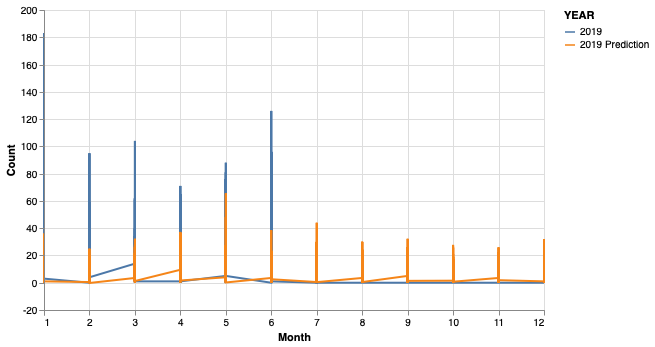

In [308]:
input_dropdown = alt.binding_select(options=Neigh)
selection = alt.selection_single(fields=['Neighborhood'], bind=input_dropdown, name='Neighborhood: ')
color = alt.condition(selection,
                    alt.Color('YEAR:N', legend=None),
                    alt.value('lightgray'))

nb_pred = alt.Chart(graf_count_plot, width=500).mark_line().encode(
    x='Month:Q',
    y='Count:Q',
    color='YEAR:N',
    tooltip=['Neighborhood:N', 'Count:Q']
).add_selection(
    selection
).transform_filter(
    selection
)

nb_pred.save('nb_pred.json')
nb_pred.save('nb_pred.html')
nb_pred